In [592]:
import pandas as pd
import re

In [593]:
import matplotlib.pyplot as plt

# TRAIN RESULTS

Estos son los resultados del entrenamiento (history). Está recogido el máximo valor de cada una de las métricas y de la loss (no sabemos que epoch es)

In [594]:
path = '/home/mr1142/Documents/Data/models/neumonia/training_data/train_max.csv'
df_train = pd.read_csv(path)

In [595]:
len(df_train[df_train.modelo == 'EffNet3'])

25

In [596]:
len(df_train[df_train.modelo == 'IncResNet'])

12

In [597]:
len(df_train)

38

In [612]:
df_train.sort_values('val_auc')

,model_name,modelo,fine,batch,lr,mask,trainprop,pixels,subset,loss,binary_accuracy,precision,auc,val_loss,val_binary_accuracy,val_precision,val_auc
9,prueba_mask_EffNet3_fine-07_batch-8_lr-001_auc-50,EffNet3,0.7,8.0,0.00100,1.0,0.8,512.0,1.0,1.908551,0.667084,0.555556,0.524823,1.136089,0.666667,0.000000,0.507500
5,prueba_mask_EffNet3_fine-00_batch-8_lr-001_auc-51,EffNet3,1.0,8.0,0.00100,1.0,0.8,512.0,1.0,3.173660,0.667501,1.000000,0.508851,1.333741,0.666667,0.350000,0.515400
25,prueba_mask_EffNet3_fine-00_batch-8_lr--05_auc-53,EffNet3,1.0,8.0,0.00001,1.0,0.8,512.0,1.0,2.209451,0.632457,0.362776,0.509652,1.353158,0.666667,0.335000,0.534931
4,prueba_mask_EffNet3_fine-00_batch-8_lr-0001_au...,EffNet3,1.0,8.0,0.00010,1.0,0.8,512.0,1.0,1.437356,0.662495,0.373134,0.520227,1.154557,0.666667,0.000000,0.540688
18,prueba_EffNet3_fine-08_batch-8_lr--05_auc-55,EffNet3,0.8,8.0,0.00001,0.0,0.8,512.0,1.0,3.967365,0.624531,0.377129,0.542798,3.514333,0.666667,0.485714,0.554756
15,prueba_EffNet3_fine-00_batch-8_lr--05_auc-56,EffNet3,1.0,8.0,0.00001,0.0,0.8,512.0,1.0,2.302544,0.633709,0.371336,0.519620,1.433460,0.676667,0.625000,0.563825
28,prueba_mask_EffNet3_fine-08_batch-8_lr--05_auc-56,EffNet3,0.8,8.0,0.00001,1.0,0.8,512.0,1.0,2.837532,0.650396,0.420408,0.541353,1.953562,0.666667,0.335000,0.564912
33,prueba_mask_EffNet3_fine-08_batch-8_lr--05_auc-80,EffNet3,0.8,8.0,0.00001,0.0,0.8,512.0,1.0,2.893495,0.720901,0.641921,0.762755,3.242736,0.751667,1.000000,0.803175
22,prueba_EffNet3_fine-05_batch-8_lr--05_auc-83,EffNet3,0.5,8.0,0.00001,0.0,0.8,512.0,1.0,3.535861,0.715478,0.601463,0.772699,5.337191,0.751667,0.664234,0.834781
34,prueba_mask_EffNet3_fine-05_batch-8_lr--05_auc-84,EffNet3,0.5,8.0,0.00001,1.0,0.8,512.0,1.0,3.457916,0.734668,0.651769,0.783202,3.194159,0.783333,0.727273,0.845619


## Filtrado

In [618]:
df_train = df_train[df_train['lr'] == 0.0001]
df_train = df_train[df_train['fine']<0.8]

## Ploteo

Text(0, 0, '')

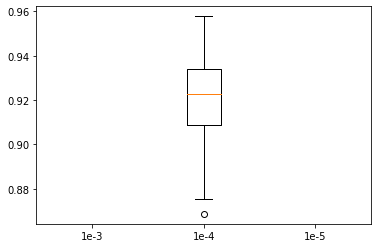

In [619]:
plt.boxplot([df_train['val_auc'][df_train.lr == 0.001], 
             df_train['val_auc'][df_train.lr == 0.0001], 
             df_train['val_auc'][df_train.lr == 0.00001]], 
            labels = ['1e-3', '1e-4', '1e-5'])
plt.text(0, 0, '')

Text(0, 0, '')

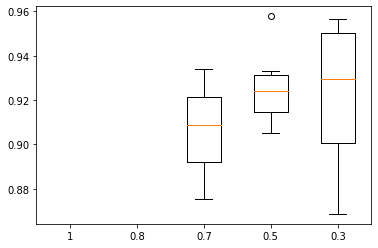

In [620]:
plt.boxplot([df_train['val_auc'][df_train.fine == 1], 
             df_train['val_auc'][df_train.fine == 0.8], 
             df_train['val_auc'][df_train.fine == 0.7], 
             df_train['val_auc'][df_train.fine == 0.5], 
             df_train['val_auc'][df_train.fine == 0.3]], 
            labels = ['1', '0.8', '0.7', '0.5', '0.3'])
plt.text(0, 0, '')

Text(0, 0, '')

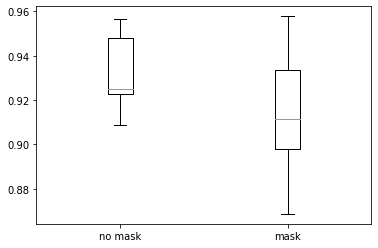

In [621]:
plt.boxplot([df_train['val_auc'][df_train['mask'] == 0], 
             df_train['val_auc'][df_train['mask'] == 1]], 
            labels = ['no mask', 'mask'])
plt.text(0, 0, '')

Text(0, 0, '')

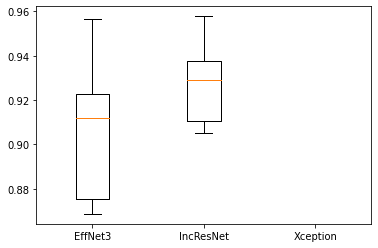

In [622]:
plt.boxplot([df_train['val_auc'][df_train['modelo'] == 'EffNet3'], 
             df_train['val_auc'][df_train['modelo'] == 'IncResNet'],
             df_train['val_auc'][df_train['modelo'] == 'Xception']], 
            labels = ['EffNet3', 'IncResNet', 'Xception'])
plt.text(0, 0, '')

# TEST RESULTS

Estos son los resultados de aplicar model.evaluate() sobre el subset de X_train que he seleccionado para test.

In [599]:
path = '/home/mr1142/Documents/Data/models/neumonia/validation_results/image_class_evaluation.csv'
df_test = pd.read_csv(path)

In [600]:
df_test.sort_values('auc')

,nombre,loss,binary_accuracy,precision,auc
3,prueba_EffNet3_fine-00_batch-8_lr-001_auc-50,1.098738,0.666667,0.000000,0.500000
16,prueba_mask_EffNet3_fine-07_batch-8_lr-001_auc-50,1.098614,0.666667,0.000000,0.500000
10,prueba_mask_EffNet3_fine-00_batch-8_lr-001_auc-51,1.100125,0.666667,0.000000,0.500000
9,prueba_mask_EffNet3_fine-00_batch-8_lr-0001_au...,1.100105,0.666667,0.000000,0.511430
25,prueba_EffNet3_fine-08_batch-8_lr--05_auc-55,1.099464,0.666667,0.000000,0.515556
11,prueba_mask_EffNet3_fine-00_batch-8_lr--05_auc-53,1.102108,0.666667,0.000000,0.522585
22,prueba_EffNet3_fine-00_batch-8_lr--05_auc-56,1.138328,0.666667,0.000000,0.528036
35,prueba_mask_EffNet3_fine-08_batch-8_lr--05_auc-56,1.100162,0.666667,0.000000,0.529845
2,prueba_EffNet3_fine-00_batch-8_lr-0001_auc-56,1.097035,0.666667,0.000000,0.530596
38,prueba_mask_EffNet3_fine-08_batch-8_lr--05_auc-80,0.746579,0.737738,0.642190,0.821180


In [602]:
df_test['mask'] = list(map(lambda x: bool(re.search('mask', x)), df_test['nombre']))

In [603]:
df_test['modelo'] = list(map(lambda x: re.split('_', x)[-5], df_test['nombre']))
df_test['lr'] = list(map(lambda x: re.split('-', re.split('_', x)[-2])[1], df_test['nombre']))
df_test['batch'] = list(map(lambda x: re.split('-', re.split('_', x)[-3])[1], df_test['nombre']))
df_test['fine'] = list(map(lambda x: re.split('-', re.split('_', x)[-4])[1], df_test['nombre']))

In [604]:
df_test.sort_values('auc')

,nombre,loss,binary_accuracy,precision,auc,mask,modelo,lr,batch,fine
3,prueba_EffNet3_fine-00_batch-8_lr-001_auc-50,1.098738,0.666667,0.000000,0.500000,False,EffNet3,001,8,00
16,prueba_mask_EffNet3_fine-07_batch-8_lr-001_auc-50,1.098614,0.666667,0.000000,0.500000,True,EffNet3,001,8,07
10,prueba_mask_EffNet3_fine-00_batch-8_lr-001_auc-51,1.100125,0.666667,0.000000,0.500000,True,EffNet3,001,8,00
9,prueba_mask_EffNet3_fine-00_batch-8_lr-0001_au...,1.100105,0.666667,0.000000,0.511430,True,EffNet3,0001,8,00
25,prueba_EffNet3_fine-08_batch-8_lr--05_auc-55,1.099464,0.666667,0.000000,0.515556,False,EffNet3,,8,08
11,prueba_mask_EffNet3_fine-00_batch-8_lr--05_auc-53,1.102108,0.666667,0.000000,0.522585,True,EffNet3,,8,00
22,prueba_EffNet3_fine-00_batch-8_lr--05_auc-56,1.138328,0.666667,0.000000,0.528036,False,EffNet3,,8,00
35,prueba_mask_EffNet3_fine-08_batch-8_lr--05_auc-56,1.100162,0.666667,0.000000,0.529845,True,EffNet3,,8,08
2,prueba_EffNet3_fine-00_batch-8_lr-0001_auc-56,1.097035,0.666667,0.000000,0.530596,False,EffNet3,0001,8,00
38,prueba_mask_EffNet3_fine-08_batch-8_lr--05_auc-80,0.746579,0.737738,0.642190,0.821180,True,EffNet3,,8,08


## Filtrado

In [629]:
df_test = df_test[df_test['lr'] == '0001']
df_test = df_test[df_test['fine'] != '00']
df_test = df_test[df_test['fine'] != '08']

## Ploteo

Text(0, 0, '')

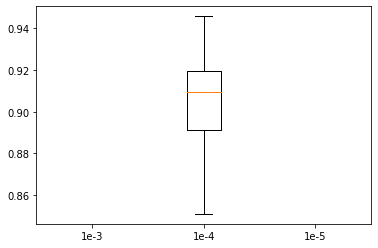

In [630]:
plt.boxplot([df_test['auc'][df_test.lr == '001'], 
             df_test['auc'][df_test.lr == '0001'], 
             df_test['auc'][df_test.lr == '']], 
            labels = ['1e-3', '1e-4', '1e-5'])
plt.text(0, 0, '')

Text(0, 0, '')

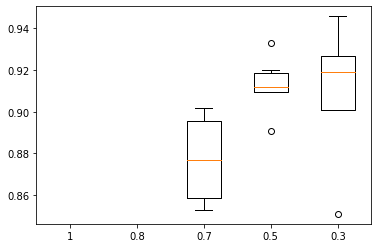

In [631]:
plt.boxplot([df_test['auc'][df_test.fine == '00'], 
             df_test['auc'][df_test.fine == '08'], 
             df_test['auc'][df_test.fine == '07'], 
             df_test['auc'][df_test.fine == '05'], 
             df_test['auc'][df_test.fine == '03']], 
            labels = ['1', '0.8', '0.7', '0.5', '0.3'])
plt.text(0, 0, '')

Text(0, 0, '')

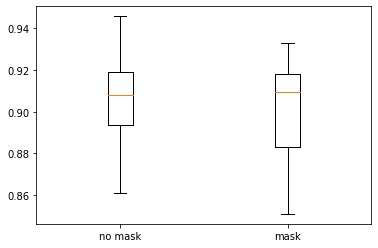

In [632]:
plt.boxplot([df_test['auc'][df_test['mask'] == False], 
             df_test['auc'][df_test['mask'] == True]], 
            labels = ['no mask', 'mask'])
plt.text(0, 0, '')

Text(0, 0, '')

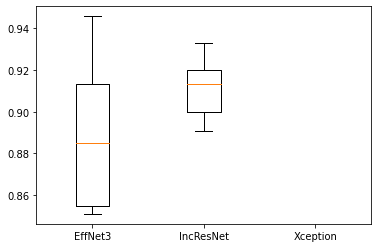

In [633]:
plt.boxplot([df_test['auc'][df_test['modelo'] == 'EffNet3'], 
             df_test['auc'][df_test['modelo'] == 'IncResNet'],
            df_test['auc'][df_test['modelo'] == 'Xception']], 
            labels = ['EffNet3', 'IncResNet', 'Xception'])
plt.text(0, 0, '')

# MIX RESULTS

In [634]:
for col in df_test.columns[1:]:
    df_train['test_' + col] = 0

In [635]:
for i in df_test.index:
    for col in df_test.columns[1:]:
        df_train['test_' + col][df_train.model_name == df_test['nombre'][i]] = df_test[col][i]

/home/mr1142/miniconda3/envs/init/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mr1142/miniconda3/envs/init/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mr1142/miniconda3/envs/init/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

In [636]:
df_train.sort_values('test_auc')

,model_name,modelo,fine,batch,lr,mask,trainprop,pixels,subset,loss,...,val_auc,test_loss,test_binary_accuracy,test_precision,test_auc,test_mask,test_modelo,test_lr,test_batch,test_fine
11,prueba_mask_EffNet3_fine-03_batch-8_lr-0001_au...,EffNet3,0.3,8.0,0.0001,1.0,0.8,512.0,1.0,2.310367,...,0.868694,0.767638,0.770437,0.666667,0.851074,True,EffNet3,0001,8,03
8,prueba_mask_EffNet3_fine-07_batch-8_lr-0001_au...,EffNet3,0.7,8.0,0.0001,1.0,0.8,512.0,1.0,1.804464,...,0.875581,0.700857,0.761095,0.684967,0.852732,True,EffNet3,0001,8,07
19,prueba_IncResNet_fine-05_batch-8_lr-0001_auc-92,IncResNet,0.5,8.0,0.0001,0.0,0.8,512.0,1.0,1.211847,...,0.924950,0.619848,0.813480,0.739651,0.890720,False,IncResNet,0001,8,05
27,prueba_mask_IncResNet_fine-07_batch-8_lr-0001_...,IncResNet,0.7,8.0,0.0001,1.0,0.8,512.0,1.0,1.413459,...,0.934225,0.873241,0.836837,0.756024,0.893302,True,IncResNet,0001,8,07
17,prueba_IncResNet_fine-07_batch-8_lr-0001_auc-90,IncResNet,0.7,8.0,0.0001,0.0,0.8,512.0,1.0,1.164905,...,0.908962,0.580889,0.822823,0.751073,0.901773,False,IncResNet,0001,8,07
10,prueba_mask_EffNet3_fine-05_batch-8_lr-0001_au...,EffNet3,0.5,8.0,0.0001,1.0,0.8,512.0,1.0,2.560124,...,0.911919,0.582447,0.832833,0.756701,0.909246,True,EffNet3,0001,8,05
36,mask_IncResNet_fine-05_batch-8_lr-0001_auc-90,IncResNet,0.5,8.0,0.0001,1.0,0.8,512.0,1.0,1.271913,...,0.905237,0.636867,0.835836,0.754774,0.909560,True,IncResNet,0001,8,05
0,prueba_EffNet3_fine-05_batch-8_lr-0001_auc-92,EffNet3,0.5,8.0,0.0001,0.0,0.8,512.0,1.0,1.940967,...,0.922913,0.541055,0.826827,0.749480,0.914539,False,EffNet3,0001,8,05
30,prueba_mask_IncResNet_fine-03_batch-8_lr-0001_...,IncResNet,0.3,8.0,0.0001,1.0,0.8,512.0,1.0,1.144002,...,0.911038,0.587443,0.828495,0.752341,0.917374,True,IncResNet,0001,8,03
32,prueba_mask_IncResNet_fine-05_batch-8_lr-0001_...,IncResNet,0.5,8.0,0.0001,1.0,0.8,512.0,1.0,1.304167,...,0.957837,0.756166,0.858859,0.789157,0.919872,True,IncResNet,0001,8,05


# PREDICTION METRICS

Estos son los resultados de aplicar model.predict() sobre el subset de X_train que he seleccionado para test. Sobre las predicciones se calculan unas métricas personalizadas

In [637]:
path = '/home/mr1142/Documents/Data/models/neumonia/validation_results/prediction_validation_metrics.csv'
df = pd.read_csv(path)

In [638]:
df.sort_values('general_auc_0')

,name,general_auc_0,younden_0,general_auc_1,younden_1,general_auc_2,younden_2,"f1_score[0, 1]","accuracy_score[0, 1]","precision_score[0, 1]",...,"recall_score[0, 2]","roc_auc_score[0, 2]","f1_score[1, 2]","accuracy_score[1, 2]","precision_score[1, 2]","recall_score[1, 2]","roc_auc_score[1, 2]",general_binary_auc_0,general_binary_auc_1,general_binary_auc_2
1,prueba_mask_IncResNet_fine-05_batch-8_lr-0001_...,0.971417,0.319967,0.884339,0.234183,0.941789,0.247605,0.606758,0.605606,0.749633,...,0.692693,0.764264,0.868241,0.866867,0.871365,0.866867,0.861862,0.919670,0.785285,0.862613
4,prueba_mask_IncResNet_fine-05_batch-8_lr-0001_...,0.974515,0.066946,0.872377,0.057974,0.930372,0.326741,0.592398,0.597598,0.778897,...,0.688689,0.763514,0.856353,0.854855,0.859571,0.854855,0.848348,0.894895,0.777778,0.847598
5,prueba_mask_IncResNet_fine-03_batch-8_lr-0001_...,0.975083,0.455335,0.878748,0.110023,0.943782,0.678301,0.595622,0.592593,0.722619,...,0.734735,0.796547,0.807455,0.801802,0.859248,0.801802,0.840841,0.918919,0.656907,0.843093
2,prueba_EffNet3_fine-03_batch-8_lr-001_auc-94,0.983957,0.340771,0.874149,0.421650,0.919113,0.200956,0.616438,0.617618,0.780082,...,0.716717,0.781532,0.844992,0.846847,0.844727,0.846847,0.816817,0.934685,0.791291,0.816817
3,prueba_IncResNet_fine-03_batch-8_lr-0001_auc-94,0.985481,0.722614,0.842784,0.250205,0.914820,0.316145,0.610858,0.607608,0.738315,...,0.740741,0.795796,0.831431,0.835836,0.833548,0.835836,0.793544,0.934685,0.760511,0.793544
0,prueba_EffNet3_fine-03_batch-8_lr-0001_auc-95,0.991293,0.122462,0.893384,0.219937,0.931752,0.491951,0.622113,0.622623,0.781861,...,0.694695,0.768769,0.855620,0.852853,0.865743,0.852853,0.858859,0.936937,0.768769,0.857357


## Cada modelo

In [577]:
model_name = 'prueba_mask_IncResNet_fine-05_batch-8_lr-0001_auc-93'

In [578]:
path = '/home/mr1142/Documents/Data/models/neumonia/validation_results/prediction_metrics_reports/' + model_name + '.csv'
df = pd.read_csv(path)

In [579]:
df

,Unnamed: 0,precision,recall,f1-score,support
0,normal,0.879765,0.900901,0.890208,333.0
1,moderado,0.758389,0.678679,0.716323,333.0
2,severo,0.780556,0.843844,0.810967,333.0
3,micro avg,0.807808,0.807808,0.807808,999.0
4,macro avg,0.806237,0.807808,0.805833,999.0
5,weighted avg,0.806237,0.807808,0.805833,999.0
6,samples avg,0.807808,0.807808,0.807808,999.0
